In [1]:
import foolbox
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from foolbox.criteria import TargetClassProbability
from foolbox.attacks import LBFGSAttack

# instantiate model
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

C:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
# if you use Jupyter notebooks
%matplotlib inline


def plot_results(image,adversarial):
    
    if adversarial is not None:
        plt.figure()

        plt.subplot(1, 3, 1)
        plt.title('Original')
        plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title('Adversarial')
        plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Difference')
        difference = adversarial[:, :, ::-1] - image
        plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
        plt.axis('off')

        plt.show()

In [13]:
# get source image and label
image, label = foolbox.utils.imagenet_example()

target_class = 935
# dictionary of imagenet classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

criterion = TargetClassProbability(target_class, p=0.10)

attack = foolbox.attacks.FGSM(fmodel)
adversarial = attack(image[:, :, ::-1], label)

In [16]:
target_class = 935
criterion = TargetClassProbability(target_class, p=0.1)

attack = LBFGSAttack(fmodel, criterion)

adversarial = attack(image, label=label)

282

935

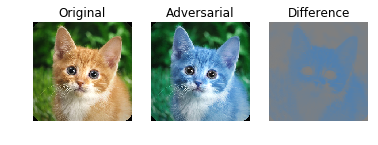

In [17]:
display(label,target_class)

plot_results(image,adversarial)